<a href="https://colab.research.google.com/github/Pranshu244/Diabetes-Prediction-Project/blob/main/Logistic%20Regression%20Model/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,log_loss,roc_auc_score,roc_curve
import pickle

In [77]:
df=pd.read_csv("diabetes.csv")

In [78]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [79]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [80]:
df.shape

(768, 9)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [82]:
miss=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
df[miss]=df[miss].replace(0,np.nan)

In [83]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [84]:
df.isnull().sum()/df.shape[0]*100

,0
Pregnancies,0.000000
Glucose,0.651042
BloodPressure,4.557292
SkinThickness,29.557292
Insulin,48.697917
BMI,1.432292
DiabetesPedigreeFunction,0.000000
Age,0.000000
Outcome,0.000000


In [85]:
df.duplicated().sum()

np.int64(0)

In [86]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


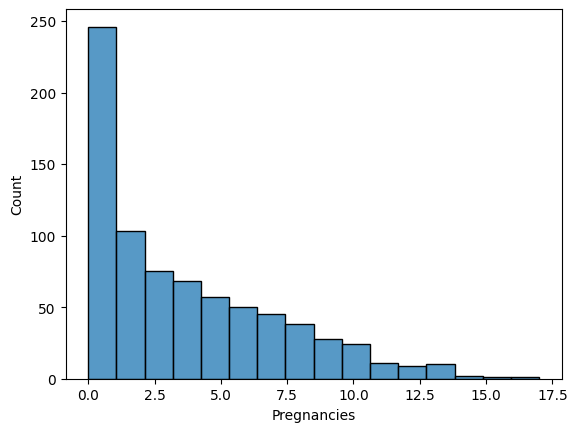

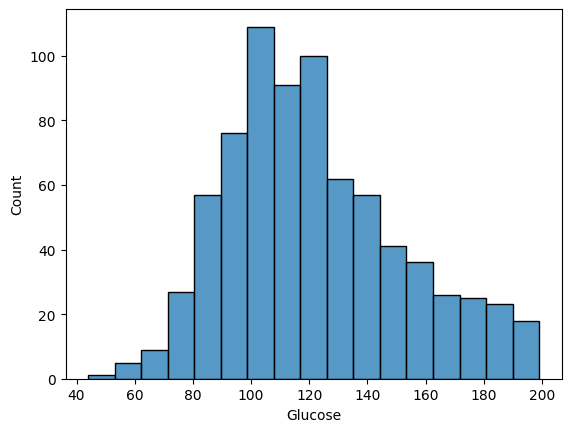

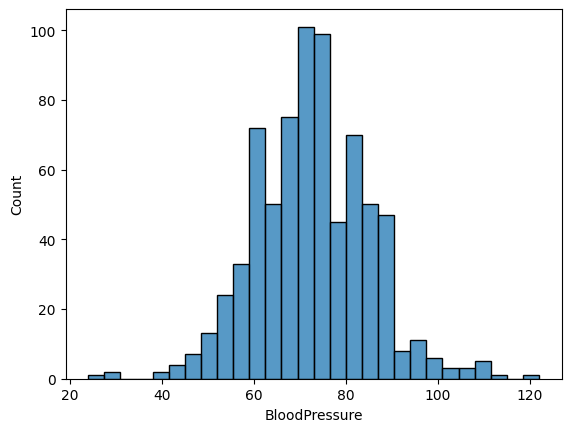

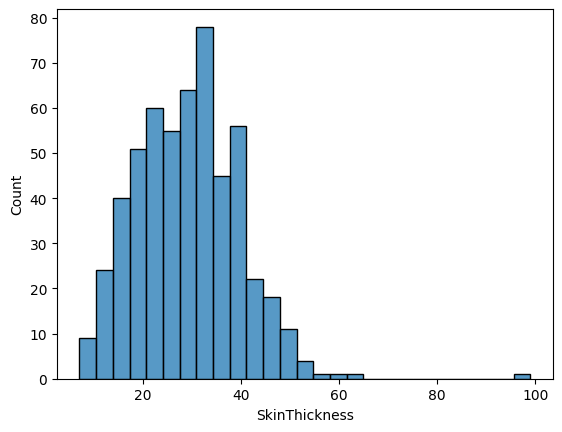

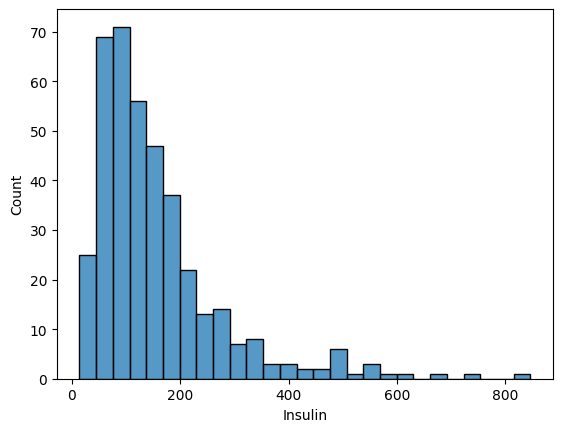

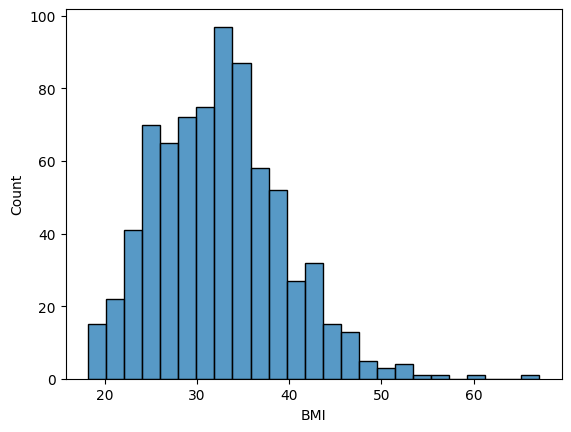

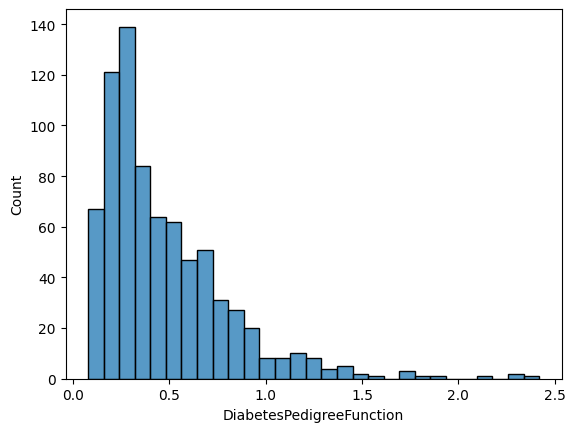

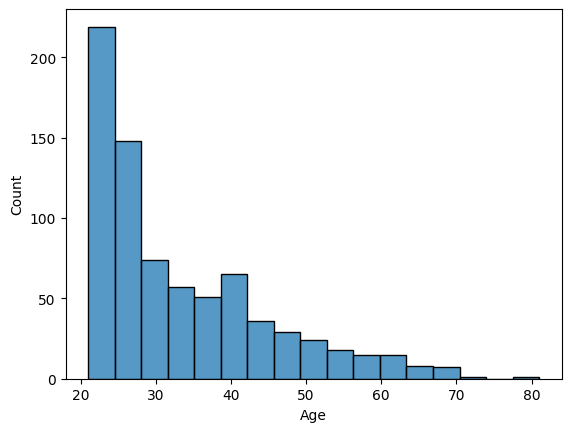

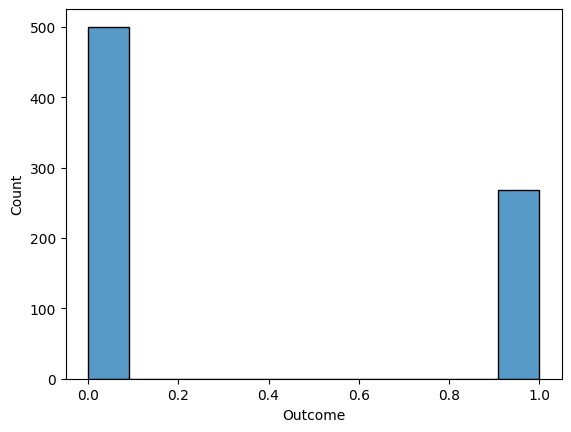

In [87]:
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

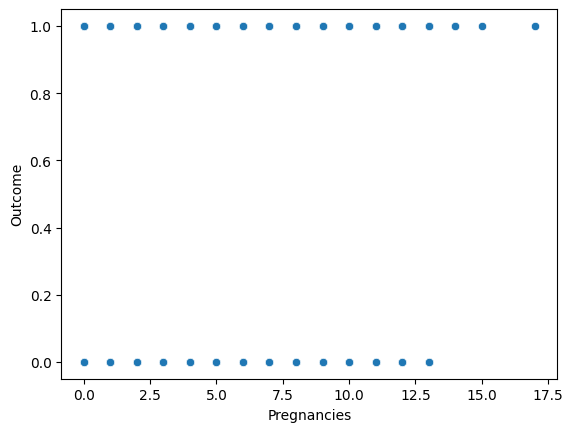

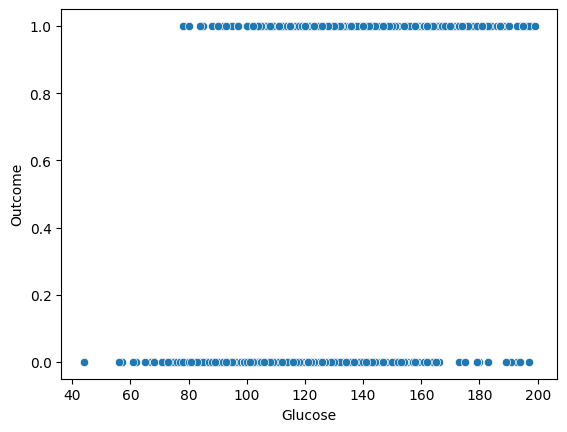

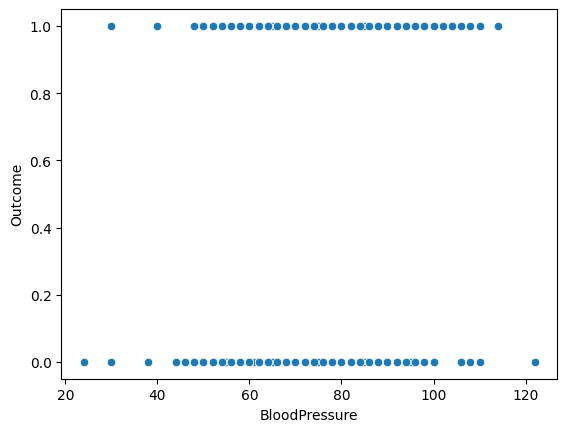

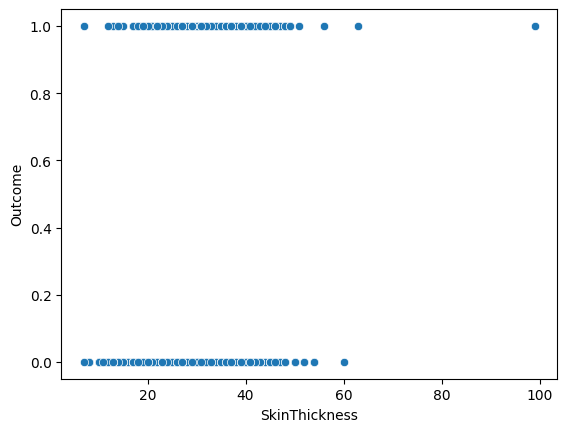

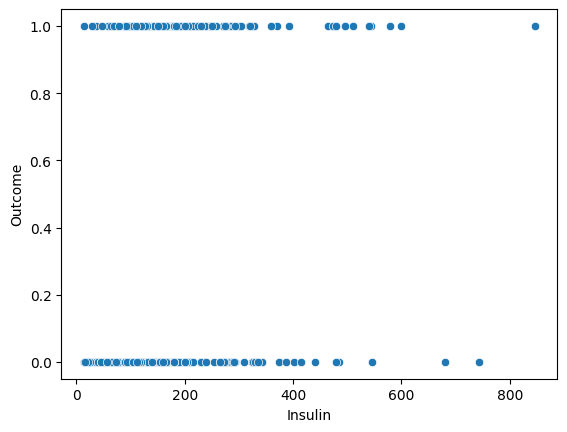

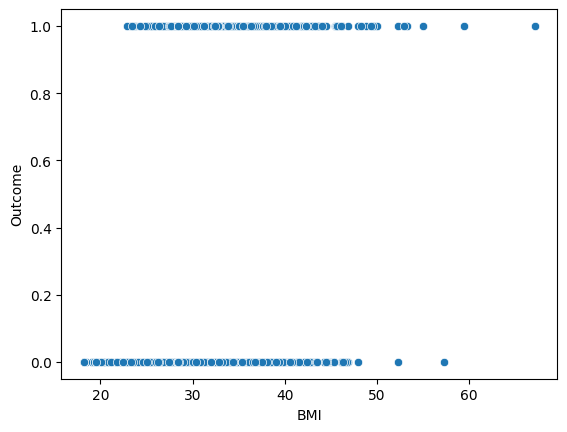

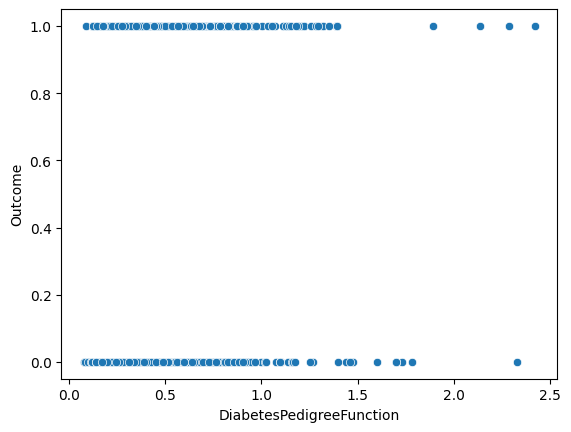

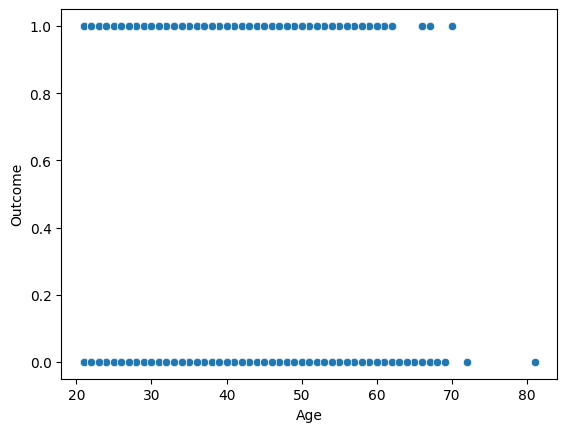

In [88]:
for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']:
  sns.scatterplot(data=df,x=i,y='Outcome')
  plt.show()

<Axes: >

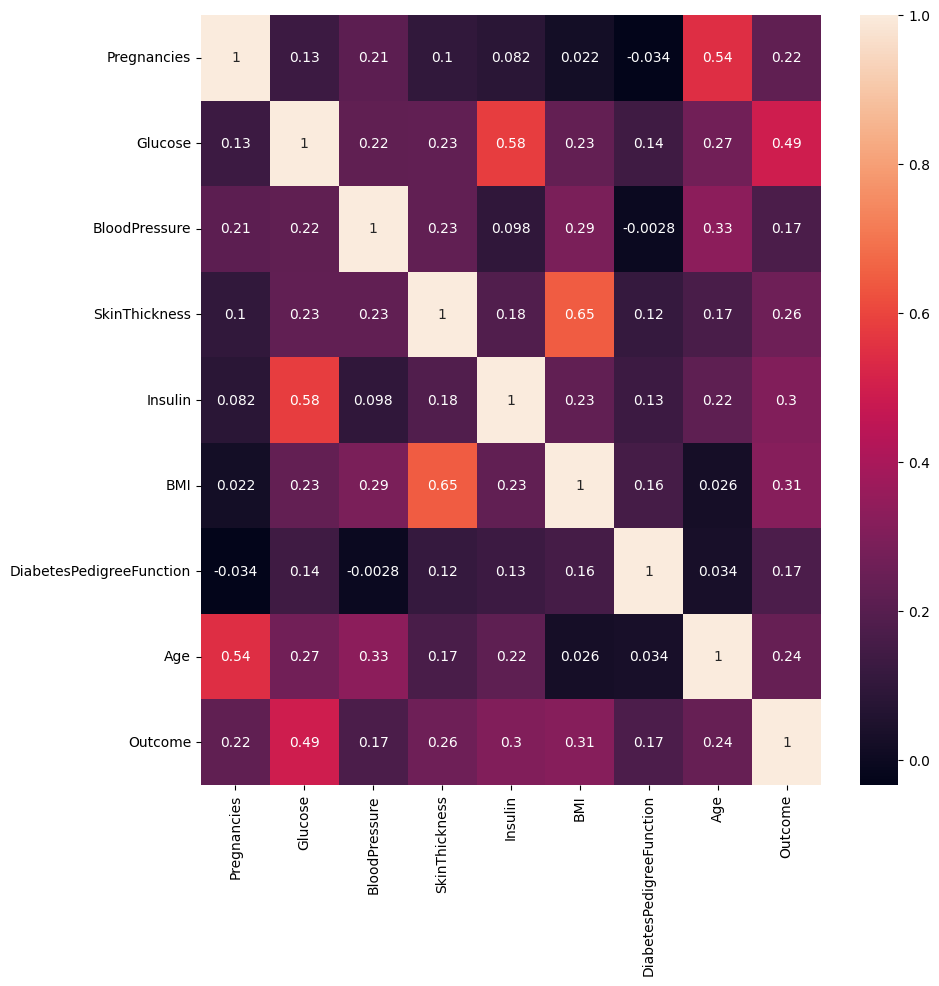

In [89]:
s=df.select_dtypes(include="number").corr()
plt.figure(figsize=(10,10))
sns.heatmap(s,annot=True)

In [90]:
impute=KNNImputer()
for i in df.select_dtypes(include="number").columns:
  df[i]=impute.fit_transform(df[[i]])

In [91]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


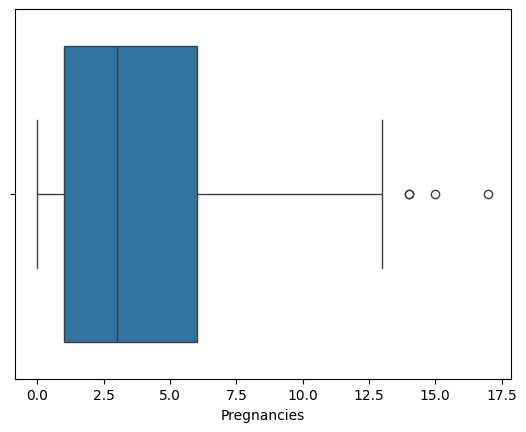

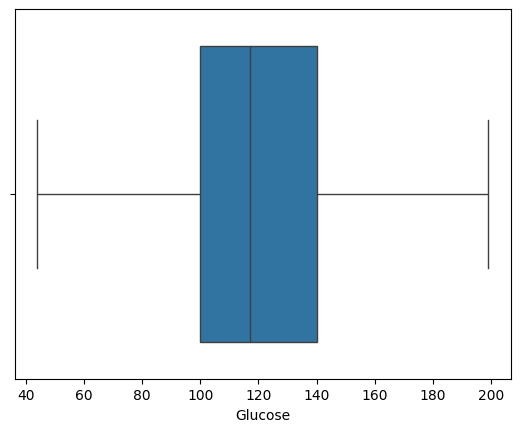

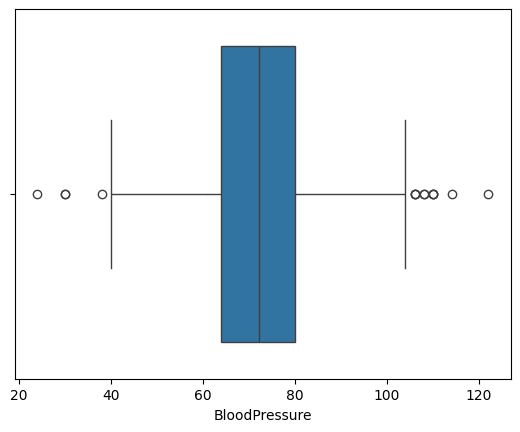

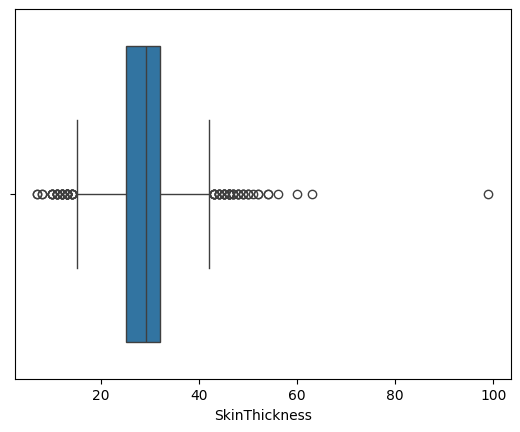

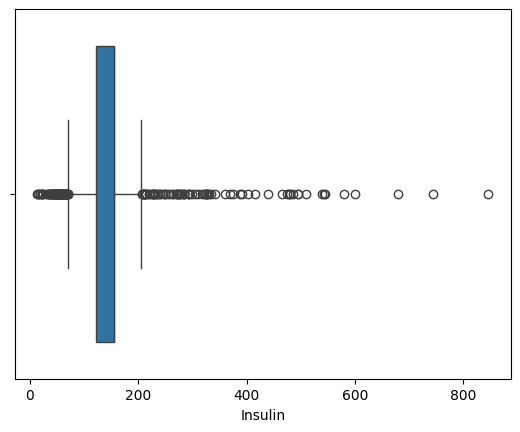

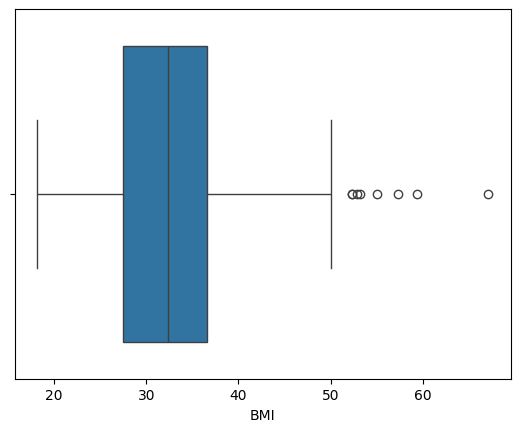

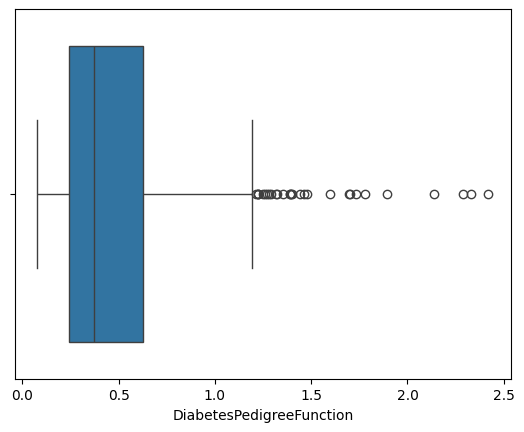

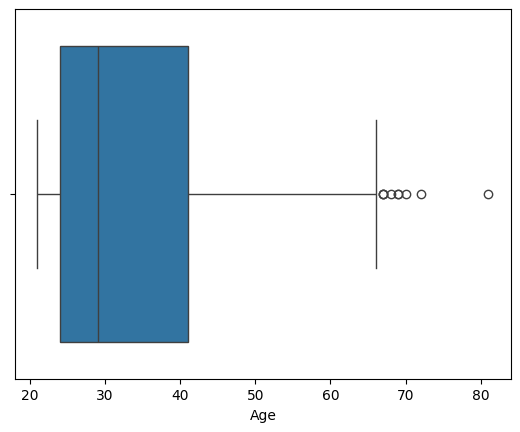

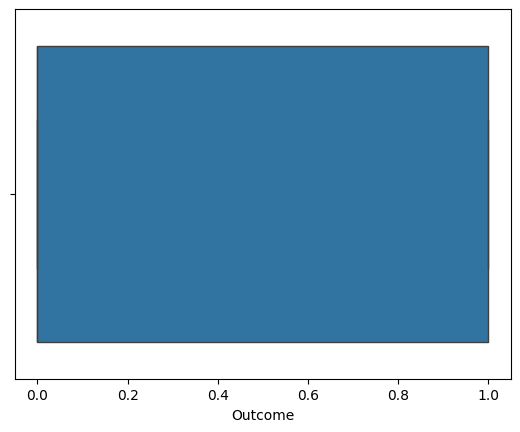

In [92]:
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [93]:
def wisker(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lw=q1-1.5*iqr
  uw=q3+1.5*iqr
  return lw,uw

In [94]:
for i in ['SkinThickness','Insulin']:
  lw,uw=wisker(df[i])
  df[i]=np.where(df[i]<lw,lw,df[i])
  df[i]=np.where(df[i]>uw,uw,df[i])

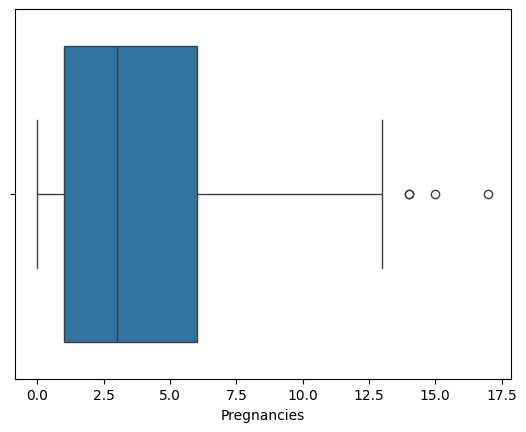

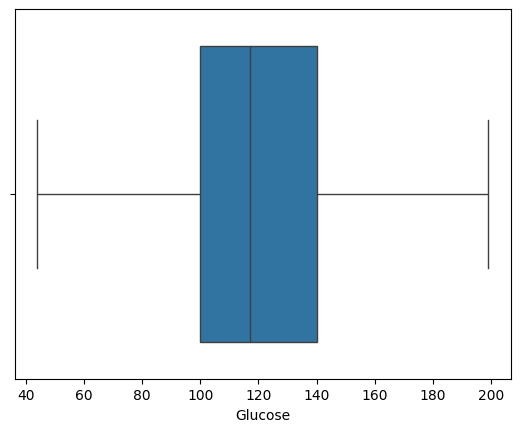

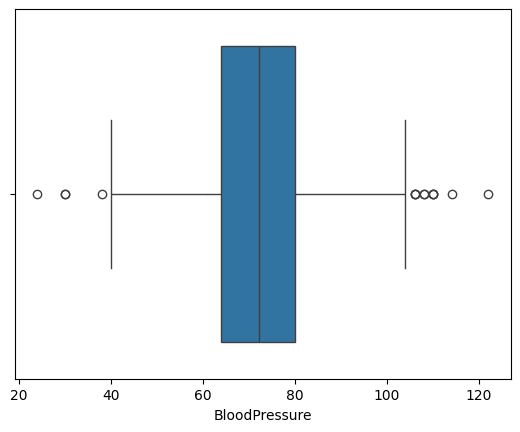

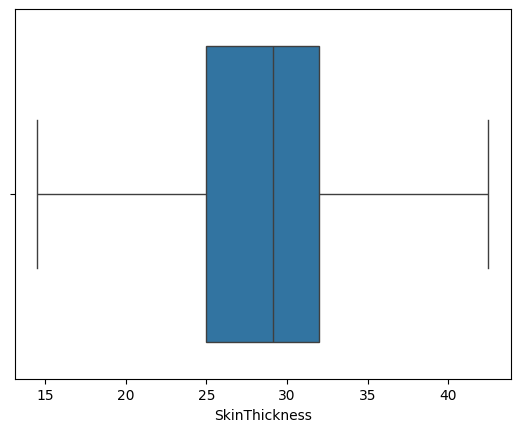

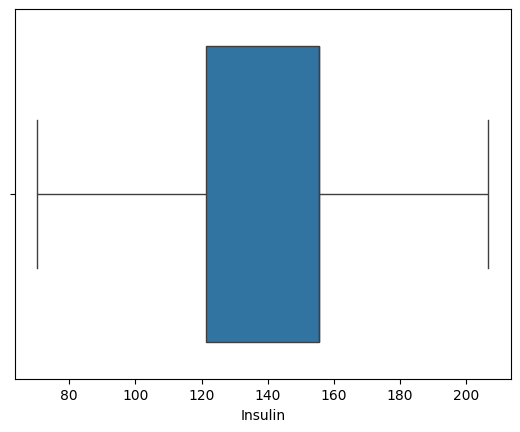

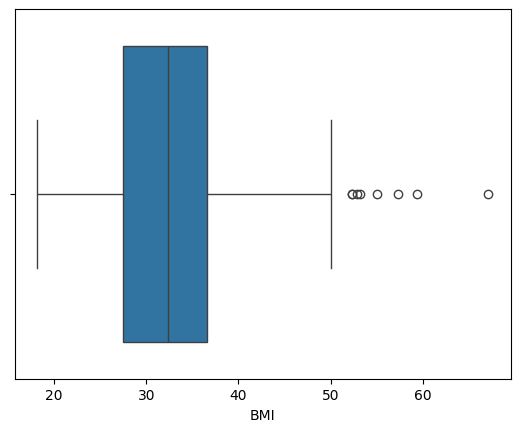

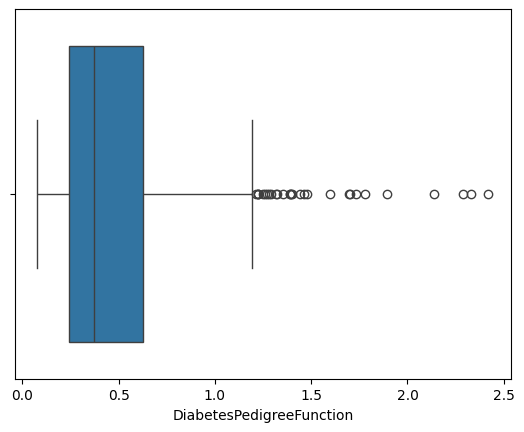

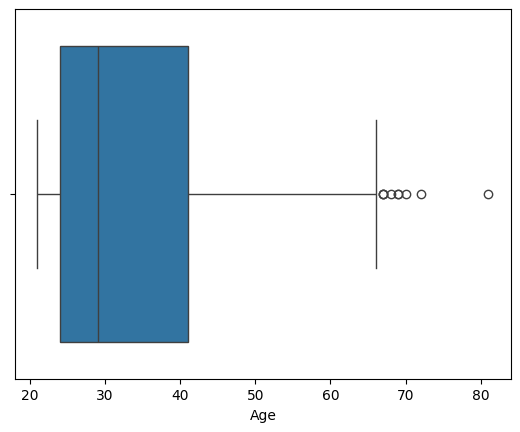

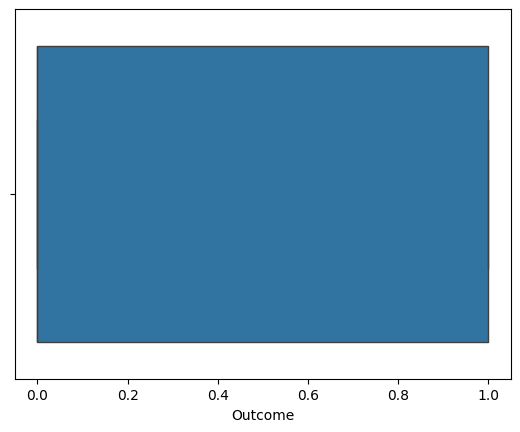

In [95]:
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [96]:
x_pd=df.iloc[:,:8]
y_pd=df.iloc[:,8]
x_np=x_pd.to_numpy()
y_np=y_pd.to_numpy()
x_train,x_test,y_train,y_test=train_test_split(x_np,y_np,test_size=0.2,random_state=42)
x_features=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']

In [97]:
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)

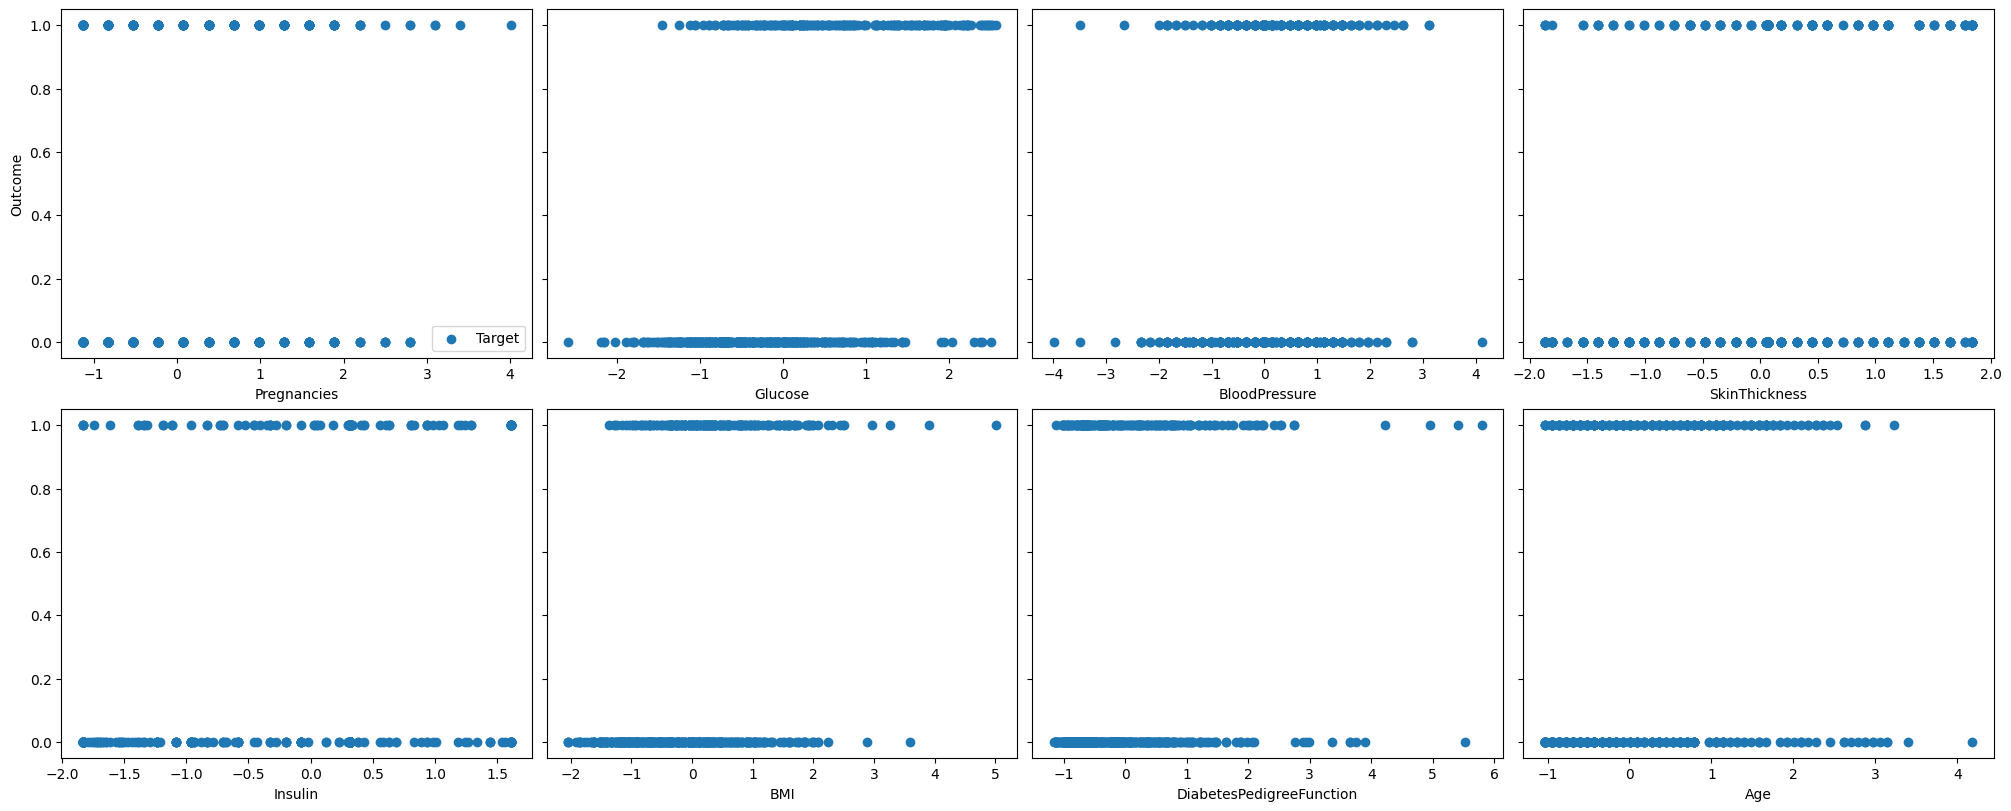

In [98]:
fig,ax=plt.subplots(2,4,figsize=(20,8),constrained_layout=True,sharey=True)
ax=ax.flatten()
for i in range(len(ax)):
  ax[i].scatter(x_train[:,i],y_train,label='Target')
  ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel('Outcome')
ax[0].legend()
plt.show()

In [99]:
model= LogisticRegression(penalty='l2',C=1.0)
model.fit(x_train,y_train)

LogisticRegression()

In [100]:
w=model.coef_
b=model.intercept_
print(f"w={w},b={b}")

w=[[ 0.22792811  0.99348794 -0.14696179  0.07101293  0.15410847  0.64852445
   0.1946371   0.38454886]],b=[-0.88600387]


In [101]:
y_pred=model.predict(x_test)

In [102]:
y_prob=model.predict_proba(x_test)[:,1]

In [103]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
best_threshold = thresholds[np.argmax(tpr - fpr)]
print("Best Threshold:", best_threshold)

Best Threshold: 0.6201913170054798


In [104]:
prob=model.predict_proba(x_test)[:,1]
y_pred=(prob>=0.6201913170054798).astype(int)

In [105]:
print("Log Loss:",log_loss(y_test,prob))

Log Loss: 0.4908333908615375


In [106]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.8116883116883117


In [107]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[92  7]
 [22 33]]


In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.93      0.86        99
         1.0       0.82      0.60      0.69        55

    accuracy                           0.81       154
   macro avg       0.82      0.76      0.78       154
weighted avg       0.81      0.81      0.80       154



In [109]:
auc=roc_auc_score(y_test,y_prob)
print('ROC AUC',auc)

ROC AUC 0.8246097337006428


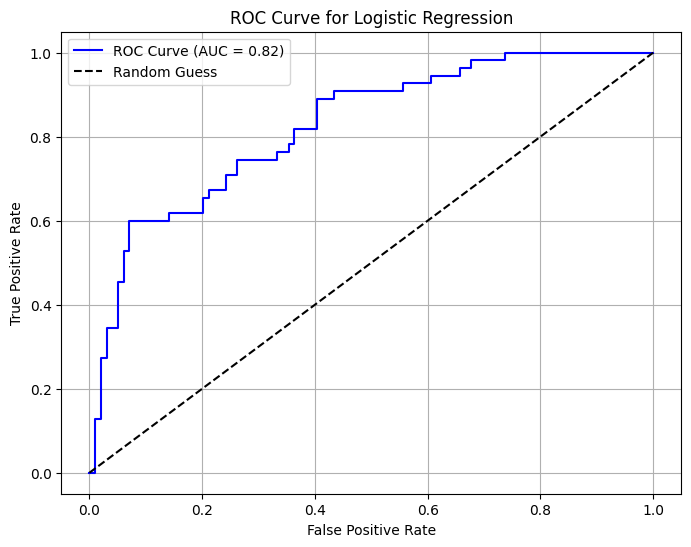

In [110]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

In [111]:
with open('model_d.pkl','wb') as file:
  pickle.dump((scalar,model),file)
print("Model saved succesfully!")

Model saved succesfully!
